# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Henil/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-2 Python-3.11.7 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [14]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [15]:
results = model(img)
results.print()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000014FED70B650>

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

NameError: name 'results' is not defined

In [10]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [16]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [20]:
IMAGES_PATH = "C:\\Users\\Henil\\Desktop\\au_haCKATHON\\YOLO-Drowsiness-Detection\\Images"
labels = ['awake', 'drowsy']
number_imgs = 20

In [32]:
cap = cv2.VideoCapture(1)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [22]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.682f657a-d85e-11ee-909e-d7577c46cbd8.jpg


In [23]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.6a4178c1-d85e-11ee-955a-d7577c46cbd8.jpg
C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.6a4178c2-d85e-11ee-84db-d7577c46cbd8.jpg
C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.6a4178c3-d85e-11ee-91e1-d7577c46cbd8.jpg
C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.6a4178c4-d85e-11ee-afba-d7577c46cbd8.jpg
C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.6a4178c5-d85e-11ee-9e45-d7577c46cbd8.jpg
C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.6a4178c6-d85e-11ee-b18d-d7577c46cbd8.jpg
C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.6a4178c7-d85e-11ee-8029-d7577c46cbd8.jpg
C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awake.6a4178c8-d85e-11ee-94c7-d7577c46cbd8.jpg
C:\Users\Henil\Desktop\au_haCKATHON\YOLO-Drowsiness-Detection\Images\awa

In [24]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [25]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/ca/ac/596e8ca16fd0634542d874c0d79219fc527ea7de73a5000092f60ecbf6e9/PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for PyQt5-sip<13,>=12.13 from https://files.pythonhosted.org/packages/8e/e2/d296cb17bae19ba49137a2649934a70d5f48cc99b7daa6ce9cf1aecddfeb/PyQt5_sip-12.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for PyQt5-Qt5>=5.15.2 from https://files.pythonhosted.org/packages/37/97/5d3b222b924fa2ed4c2488925155cd0b03fd5d09ee1cfcf7c553c11c9f66/PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/6.8 MB 812.7 kB/s eta 0:00:09
   - -------------------------------------- 0.2/6.8 MB 1.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/6.8 MB 2.3 MB


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2 


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-288-gb9392361 Python-3.11.7 torch-2.2.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2,

# 6. Load Custom Model

In [55]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Henil/.cache\torch\hub\master.zip
YOLOv5  2024-3-2 Python-3.11.7 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [56]:
img = "C:\\Users\\Henil\\Desktop\\au_haCKATHON\\YOLO-Drowsiness-Detection\\yolov5\\data\\images\\awake.4bc0599d-d866-11ee-84c9-d7577c46cbd8.jpg"

In [57]:
results = model(img)

In [58]:
results.print()

image 1/1: 480x640 1 awake
Speed: 37.8ms pre-process, 494.1ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)


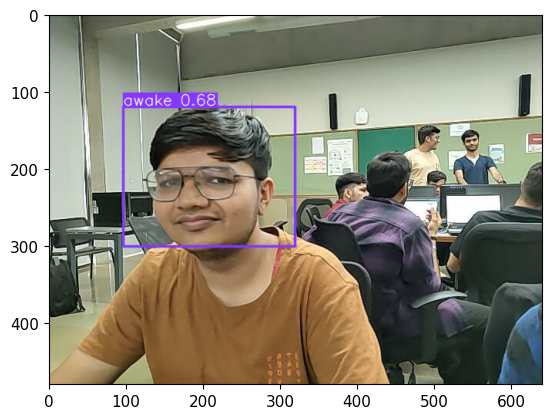

In [59]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [61]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()